## Reading data and EDA

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
hs = pd.read_csv("housing.csv")
hs.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
df = pd.DataFrame(hs)
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.isnull().values.any()

False

In [5]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [6]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [7]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [9]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

## Prediction using linear regression

In [10]:
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df[['MEDV']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# (normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression()

In [13]:
pred = lin_reg.predict(X_test)

In [14]:
import matplotlib.pyplot as plt
 
lin_reg.score(X_test,y_test)

0.7621286453572171

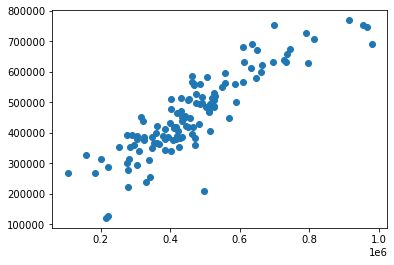

In [15]:
plt.scatter(y_test, pred)

In [28]:
 # print_evaluate(y_test, pred)
# print((y==pred).sum()/y.shape[0])

In [27]:
# house_df_features = house_df[['RM', 'LSTAT', 'PTRATIO']]
# house_df_response = house_df[['MEDV']]
# x_train,x_test,y_train,y_test = train_test_split(house_df_features, house_df_response, random_state=42, test_size=0.3)
# linear_model = LinearRegression()
# linear_model.fit(x_train, y_train)
# y_pred = linear_model.predict(x_test)
# score = accuracy_score(y_test, y_pred)
# print(score)

# test_pred = lin_reg.predict(X_test)
# train_pred = lin_reg.predict(X_train)

# print('Test set evaluation:\n_____________________________________')
# # print_evaluate(y_test, test_pred)
# score = lin_reg.score(y_test, test_pred)
# print(score)
# # print('Train set evaluation:\n_____________________________________')
# # print_evaluate(y_train, train_pred)

In [16]:
# Coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lin_reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lin_reg.score(X_test, y_test))

Coefficients: 
 [[ 81549.36138662 -10636.06431601 -20154.91344504]]
Mean squared error: 6437219921.48
Variance score: 0.76


In [17]:
f1 = df[['RM']]
r = df[['MEDV']]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(f1,r, test_size=0.25)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(366, 1) (123, 1)
(366, 1) (123, 1)


In [21]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
print(r2_score(y_test,y_pred))

0.41876876305789135


In [24]:
print(linear_model.coef_)
print(mean_squared_error(y_test, y_pred))

[[184584.36853741]]
16235549450.507921


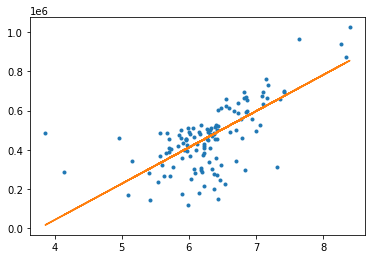

In [26]:
# Plot outputs
figure = plt.figure()
# (figsize = (10, 7))
plt.plot(x_test, y_test, '.', x_test, y_pred, '-')
plt.show()

(366, 1) (123, 1)
(366, 1) (123, 1)
0.6239882148097875
[[-18257.06265022]]
9441734022.946394


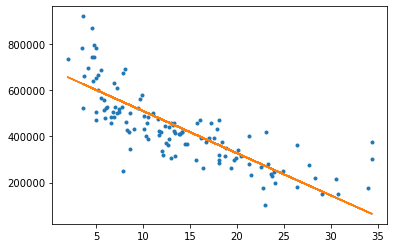

In [27]:
f1 = df[['LSTAT']]
r = df[['MEDV']]
x_train,x_test,y_train,y_test = train_test_split(f1,r, test_size=0.25)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
print(r2_score(y_test,y_pred))
print(linear_model.coef_)
print(mean_squared_error(y_test, y_pred))
# Plot outputs
figure = plt.figure()
# (figsize = (10, 7))
plt.plot(x_test, y_test, '.', x_test, y_pred, '-')
plt.show()

(366, 1) (123, 1)
(366, 1) (123, 1)
0.27189480438978
[[-37471.85444887]]
25460681527.325512


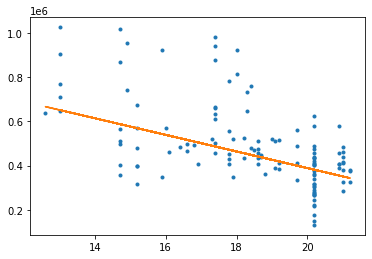

In [28]:
f1 = df[['PTRATIO']]
r = df[['MEDV']]
x_train,x_test,y_train,y_test = train_test_split(f1,r, test_size=0.25)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
print(r2_score(y_test,y_pred))
print(linear_model.coef_)
print(mean_squared_error(y_test, y_pred))
# Plot outputs
figure = plt.figure()
# (figsize = (10, 7))
plt.plot(x_test, y_test, '.', x_test, y_pred, '-')
plt.show()